# Recommendation System: Product Targetting Model
## Dataset consists of direct marketing campaigns by a Portuguese banking institution, using phone calls, which are aimed to sell subscriptions to a bank term deposit

#### Importing and preprocessing data

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
bm = pd.read_csv("/Users/raghav/Downloads/bank-marketing.csv", sep=";")

# Separate features and target variable
X = bm.drop(columns=['y'])
y = bm['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'string']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [191]:
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [192]:
bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [193]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,mon,94,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
35451,31,admin.,married,university.degree,no,no,no,cellular,may,mon,116,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
30592,59,retired,married,basic.4y,no,no,no,cellular,may,mon,13,6,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,jul,tue,94,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
3315,39,admin.,single,high.school,unknown,no,no,telephone,may,thu,344,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0


In [194]:
y_train.head()

12556    0
35451    0
30592    0
17914    0
3315     0
Name: y, dtype: int64

### Time Series Analytics & visualizations

Campaign success by month-

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: y, dtype: float64


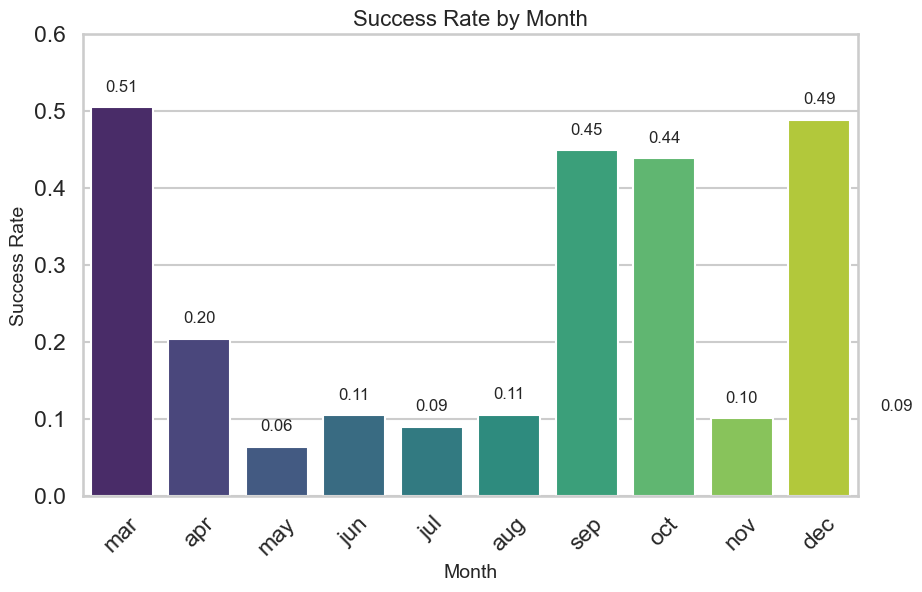

In [224]:
# Success rate by month
monthly_trend = bm.groupby('month')['y'].apply(lambda x: (x == 'yes').mean())
print(monthly_trend)

monthly_trend = bm.groupby('month')['y'].apply(lambda x: (x == 'yes').mean())
monthly_trend = monthly_trend.reindex(['mar','apr','may','jun','jul', 'aug', 'sep','oct','nov','dec', 'jul'])
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='viridis')

# Adding titles and labels
plt.title('Success Rate by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 0.6)

# Adding value labels on each bar
for index, value in enumerate(monthly_trend.values):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

# Display the plot
plt.show()

Campaign success by days of week-

day_of_week
fri     846
mon     847
thu    1045
tue     953
wed     949
Name: y, dtype: int64


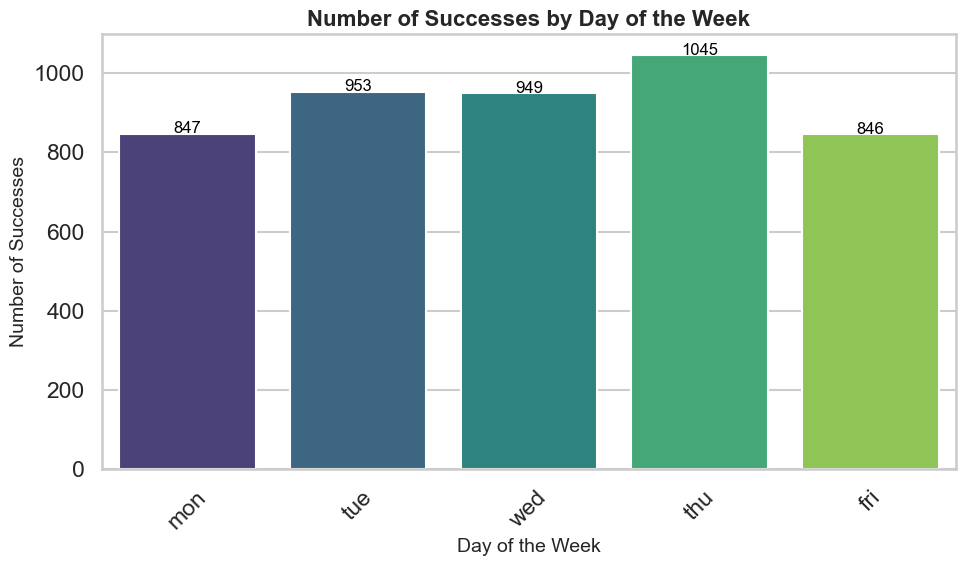

In [225]:
# Count successes by day of the week
daily_success = bm.groupby('day_of_week')['y'].apply(lambda x: (x == 'yes').sum())
print(daily_success)

days_order = ['mon', 'tue', 'wed', 'thu', 'fri']
daily_success = daily_success.reindex(days_order)

# Set the style and context for high-quality visualization
sns.set(style="whitegrid", context="talk", palette="muted")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_success.index, y=daily_success.values, palette="viridis")

# Add titles and labels
ax.set_title('Number of Successes by Day of the Week', fontsize=16, weight='bold')
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Number of Successes', fontsize=14)

# Annotate the bars with the exact values
for i, v in enumerate(daily_success.values):
    ax.text(i, v + 1, str(v), color='black', ha='center', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Conversion-rate vs Number of days that passed by after the client was last contacted-

pdays
0     0.666667
1     0.307692
2     0.606557
3     0.678815
4     0.533898
5     0.630435
6     0.701456
7     0.666667
8     0.666667
9     0.546875
10    0.576923
11    0.535714
12    0.448276
13    0.777778
14    0.550000
15    0.666667
16    0.545455
17    0.250000
18    0.571429
19    0.333333
20    0.000000
21    1.000000
22    0.666667
25    1.000000
26    1.000000
27    1.000000
Name: y, dtype: float64


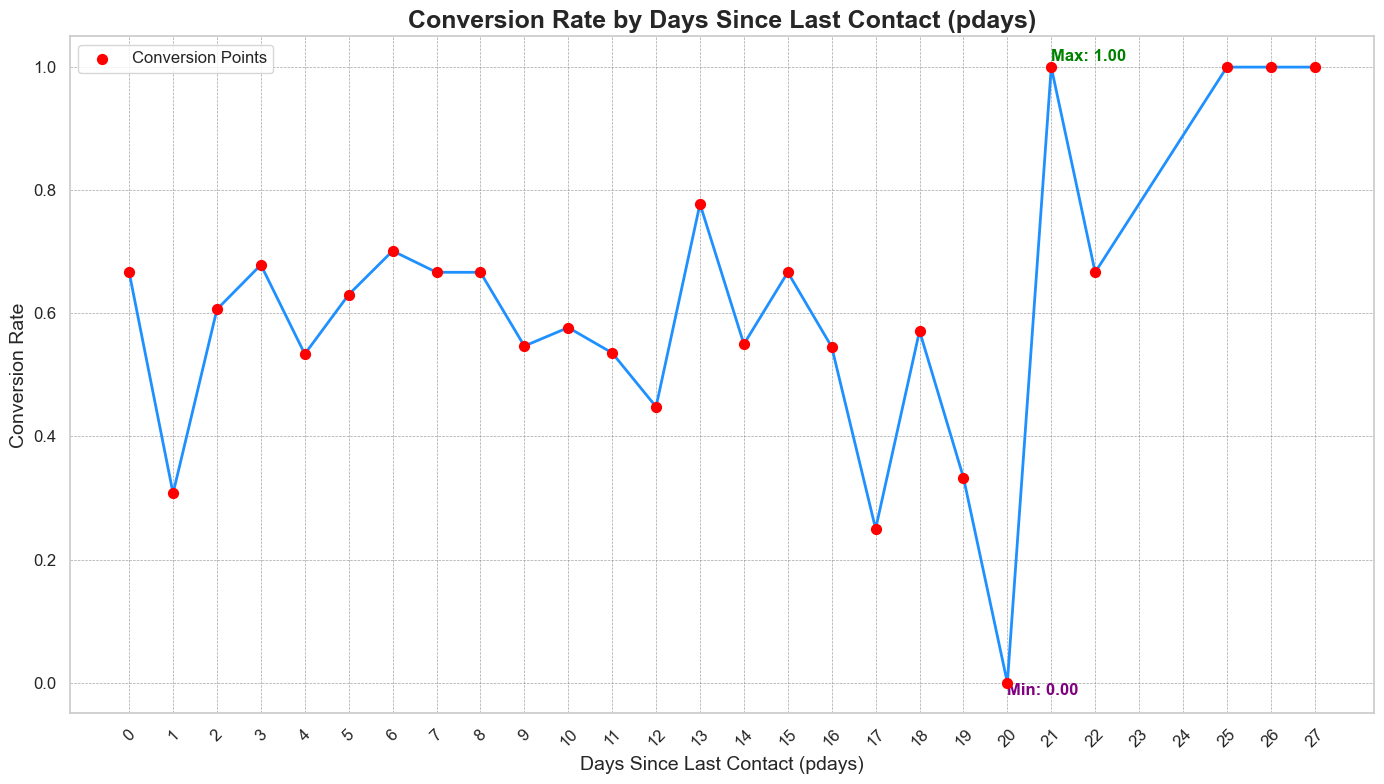

In [232]:
# Conversion rate by days since last contact
pdays_analysis = bm.groupby('pdays')['y'].apply(lambda x: (x == 'yes').mean())
pdays_analysis = pdays_analysis[pdays_analysis.index != 999] #Outlier removal, client not previously contacted
print(pdays_analysis)

pdays_analysis = pdays_analysis.reset_index()
pdays_analysis.columns = ['pdays', 'conversion_rate']

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=pdays_analysis,
    x='pdays',
    y='conversion_rate',
    marker='o',
    color='dodgerblue',
    linewidth=2
)

# Highlight important points
plt.scatter(
    pdays_analysis['pdays'], pdays_analysis['conversion_rate'], 
    color='red', s=50, zorder=5, label='Conversion Points'
)

# Titles and labels
plt.title("Conversion Rate by Days Since Last Contact (pdays)", fontsize=18, weight='bold')
plt.xlabel("Days Since Last Contact (pdays)", fontsize=14)
plt.ylabel("Conversion Rate", fontsize=14)

# Customize x-axis ticks to show all pdays values
plt.xticks(ticks=range(int(pdays_analysis['pdays'].min()), int(pdays_analysis['pdays'].max()) + 1), fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding grid and style
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotating maximum and minimum points
max_point = pdays_analysis.loc[pdays_analysis['conversion_rate'].idxmax()]
min_point = pdays_analysis.loc[pdays_analysis['conversion_rate'].idxmin()]
plt.text(max_point['pdays'], max_point['conversion_rate'] + 0.01, 
         f"Max: {max_point['conversion_rate']:.2f}", color='green', fontsize=12, weight='bold')
plt.text(min_point['pdays'], min_point['conversion_rate'] - 0.02, 
         f"Min: {min_point['conversion_rate']:.2f}", color='purple', fontsize=12, weight='bold')

# Show legend
plt.legend(fontsize=12)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

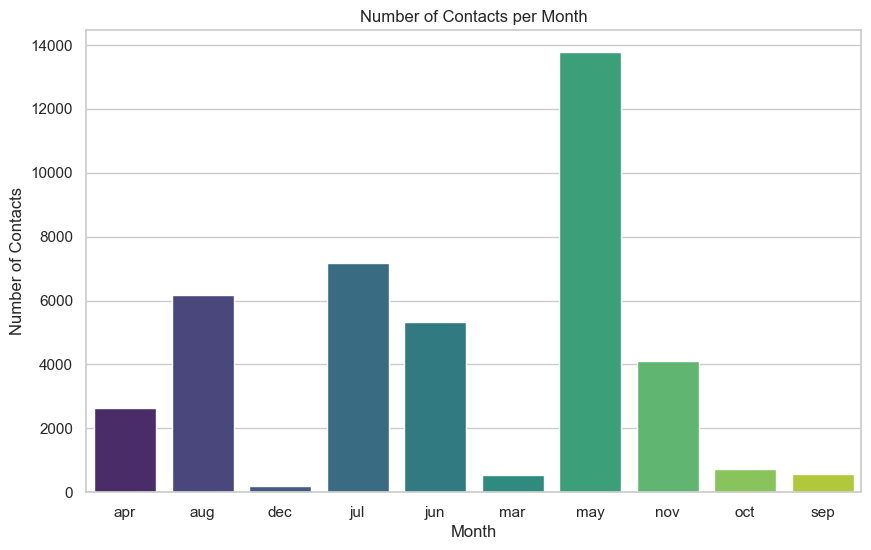

In [234]:
contacts_per_month = bm['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=contacts_per_month.index, y=contacts_per_month.values, palette='viridis')
plt.title('Number of Contacts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()

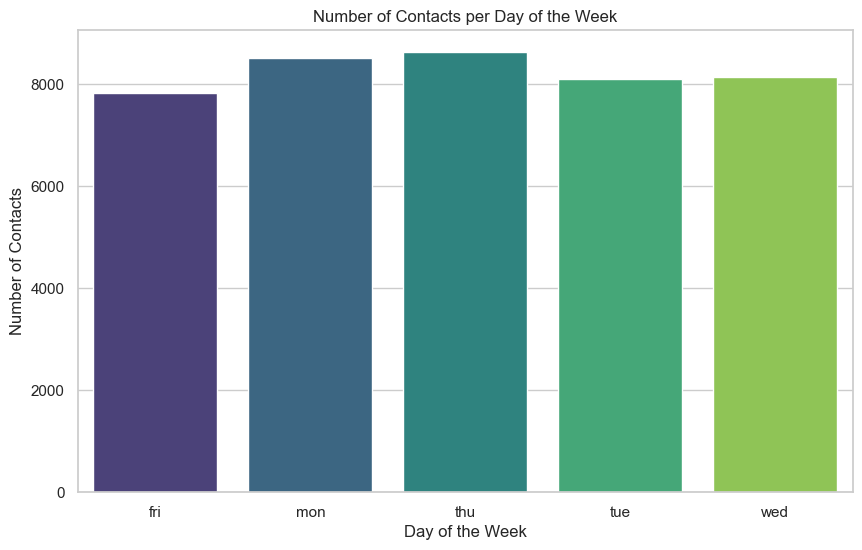

In [236]:
contacts_per_day = bm['day_of_week'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=contacts_per_day.index, y=contacts_per_day.values, palette='viridis')
plt.title('Number of Contacts per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Contacts')
plt.show()

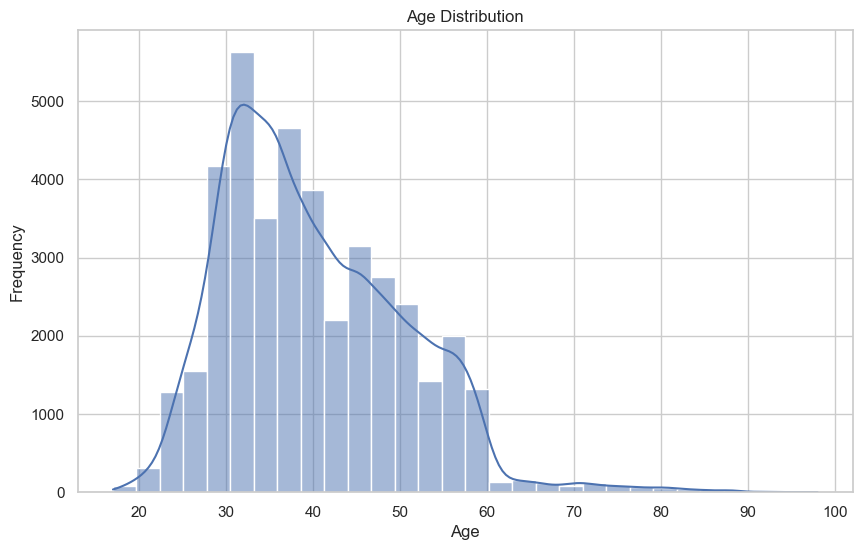

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(bm['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

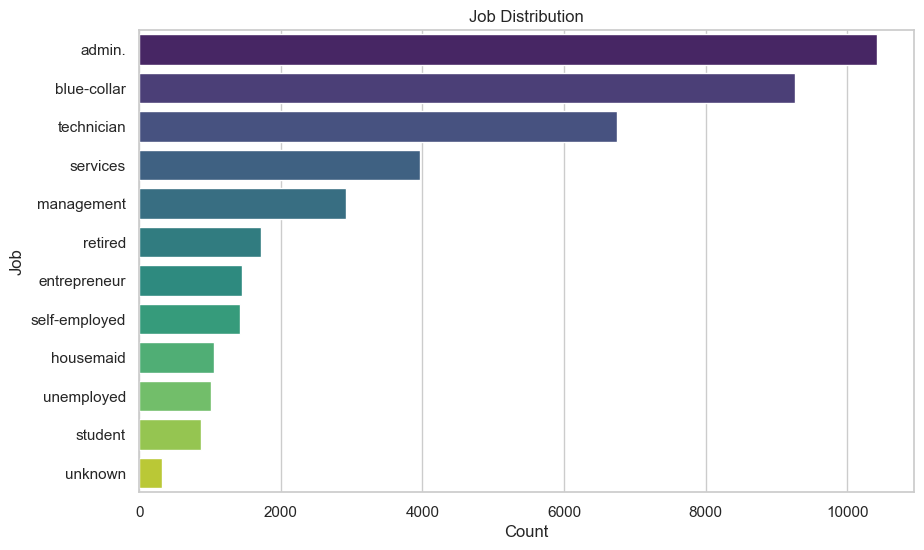

In [239]:
# Job distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=bm['job'], order=bm['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

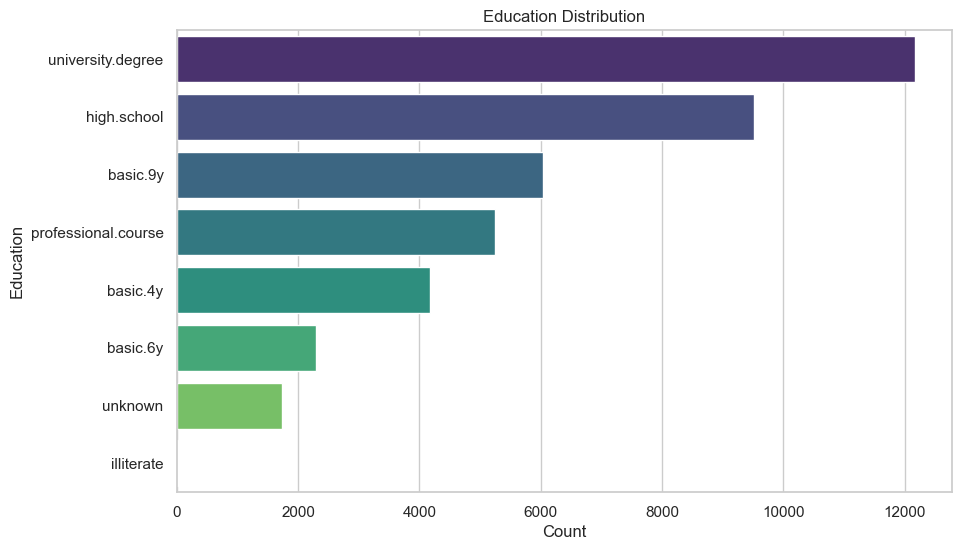

In [240]:
# Education distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=bm['education'], order=bm['education'].value_counts().index, palette='viridis')
plt.title('Education Distribution')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()


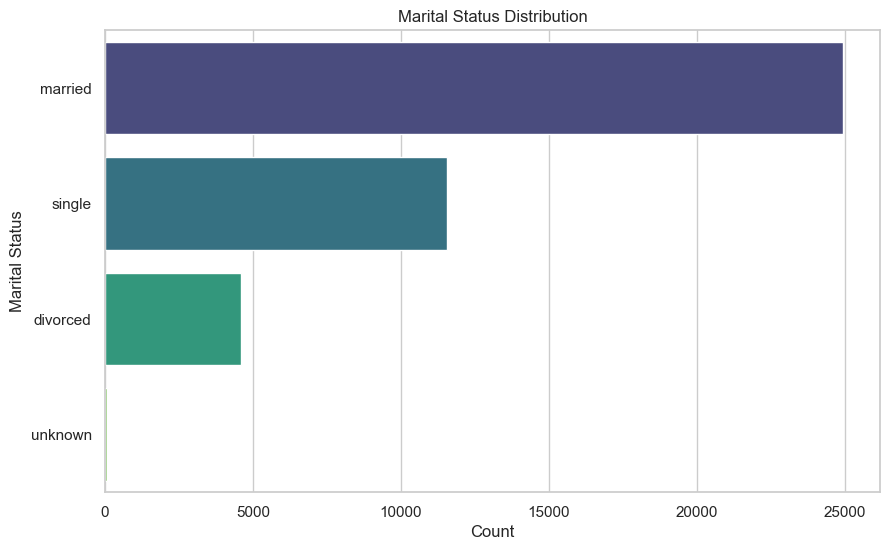

In [241]:
# Marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=bm['marital'], order=bm['marital'].value_counts().index, palette='viridis')
plt.title('Marital Status Distribution')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

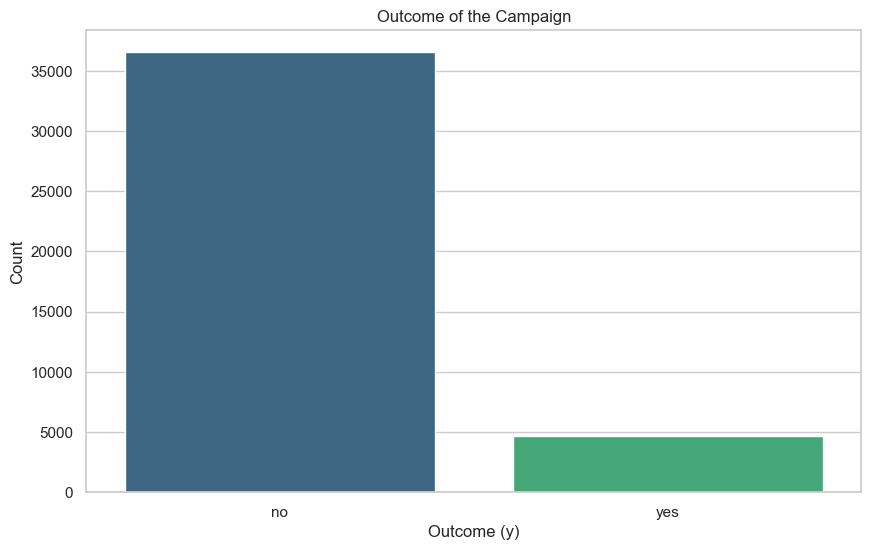

In [242]:
# Outcome of the campaign
outcome = bm['y'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome.index, y=outcome.values, palette='viridis')
plt.title('Outcome of the Campaign')
plt.xlabel('Outcome (y)')
plt.ylabel('Count')
plt.show()


/var/folders/4k/ppk1bjp50_33bm8_tl6w0z4h0000gn/T/ipykernel_62666/399851327.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



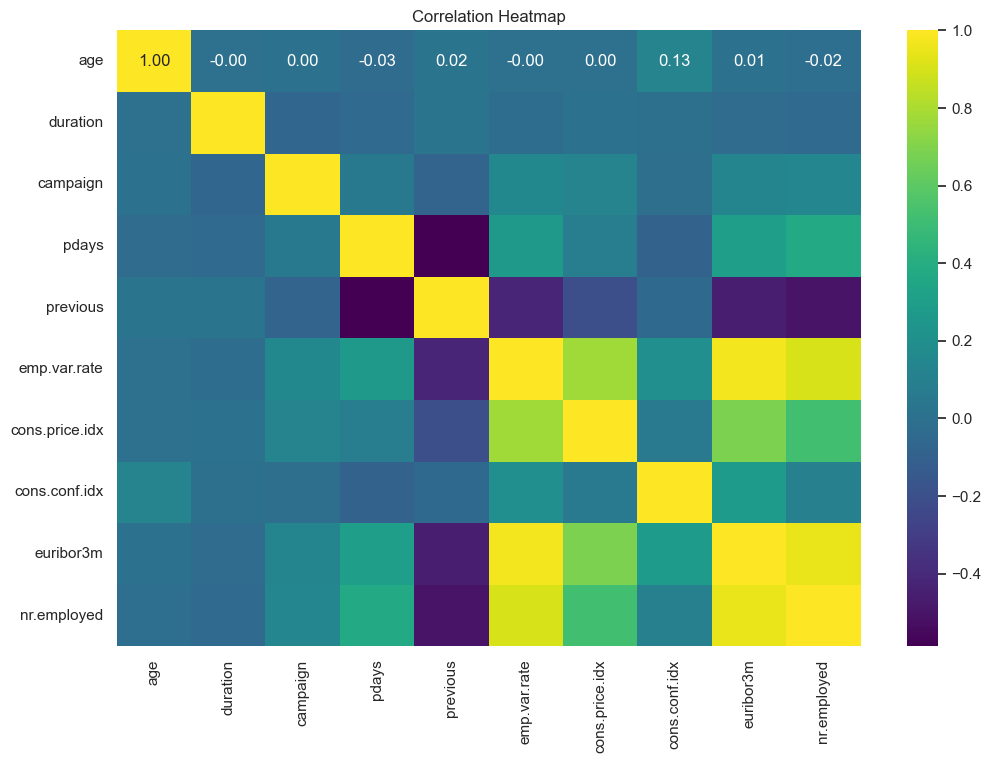

In [244]:
# Correlation heatmap
corr_matrix = bm.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/Users/raghav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/raghav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/raghav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/raghav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



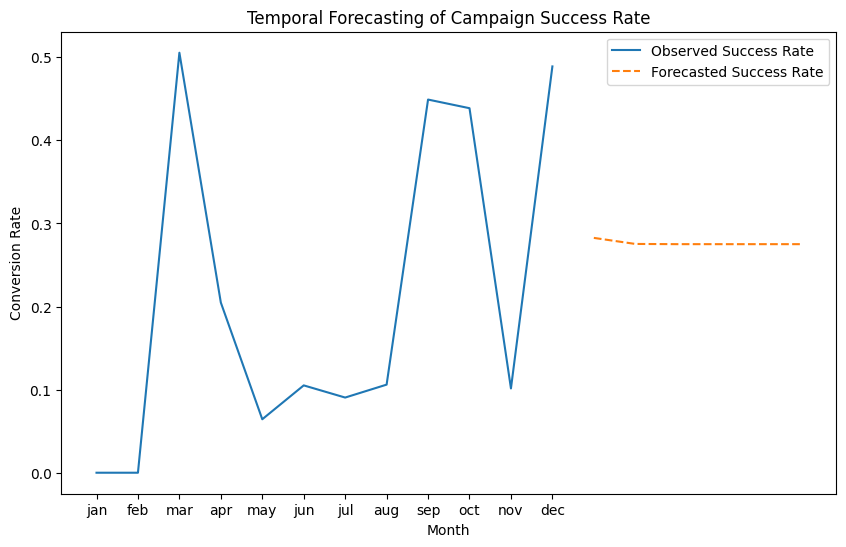

          Month  Forecasted Success Rate
0  Next_Month_1                 0.282633
1  Next_Month_2                 0.275353
2  Next_Month_3                 0.275096
3  Next_Month_4                 0.275087
4  Next_Month_5                 0.275086
5  Next_Month_6                 0.275086


In [109]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'month' is already in order and conversion rate is calculated
# Step 1: Aggregate success rate by month
bm['y_binary'] = bm['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert to binary
monthly_data = bm.groupby('month')['y_binary'].mean()  # Calculate success rate

# Step 2: Ensure proper ordering of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_data = monthly_data.reindex(month_order)

# Step 3: Handle missing values (if any months are missing)
monthly_data = monthly_data.fillna(0)  # Replace missing rates with 0

# Step 4: Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))  # ARIMA(p, d, q)
arima_result = model.fit()

# Step 5: Forecast future months (e.g., next 6 months)
forecast_steps = 6
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.Index(month_order).append(pd.Index(['next_month' + str(i) for i in range(1, forecast_steps + 1)]))

# Step 6: Visualize
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label="Observed Success Rate")
plt.plot(forecast.index, forecast, label="Forecasted Success Rate", linestyle='--')
plt.xlabel("Month")
plt.ylabel("Conversion Rate")
plt.title("Temporal Forecasting of Campaign Success Rate")
plt.legend()
plt.show()

# Step 7: Print forecasted values
forecast_df = pd.DataFrame({
    'Month': ['Next_Month_' + str(i) for i in range(1, forecast_steps + 1)],
    'Forecasted Success Rate': forecast.values
})
print(forecast_df)

### Recommendation System: Whether the customer will sign up for term deposit or not

Model Building:

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True)
}

# Evaluate each model using cross-validation
model_scores = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    model_scores[name] = np.mean(scores)
    print(f"{name} Accuracy: {np.mean(scores):.4f}")

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Logistic Regression Accuracy: 0.9111
Random Forest Accuracy: 0.9122
Gradient Boosting Accuracy: 0.9161
SVM Accuracy: 0.9115
Best Model: Gradient Boosting


Hyperparameter Tuning:

In [255]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Set up the parameter grid for the classifier
param_grid = {
    'classifier__n_estimators': [1,10,20],
    'classifier__max_depth': [3, 5, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Output the best parameters and cross-validation score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 20}
Best cross-validation score: 0.916176024279211


In [258]:
# Best pipeline from the grid search
best_pipeline = grid_search.best_estimator_
# Retrain on the entire training set
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=5,
                                            n_estimators=20,
                                            random_state=42))])

In [265]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = best_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Set Accuracy: 0.9199

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.68      0.56      0.61       935

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.91      0.92      0.92      8238


Confusion Matrix:
[[7056  247]
 [ 413  522]]


After implementing grid search on gradient boosting clasification model, the accuracy is 92%

Predict the likelihood of a new customer subscribing to a term deposit:


In [273]:
#Sample
new_customer = pd.DataFrame({
    'age': [30],
    'job': ['admin'],
    'marital': ['married'],
    'education': ['university.degree'],
    'default': ['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['telephone'],
    'month': ['dec'],
    'day_of_week': ['thur'],
    'campaign': [1],
    'pdays': [999],
    'previous': [0],
    'poutcome': ['nonexistent'],
    'emp.var.rate': [1.1],
    'cons.price.idx': [93.994],
    'cons.conf.idx': [-36.4],
    'euribor3m': [4.857],
    'nr.employed': [5191],
    'duration': [0]
})

# Predict the likelihood
likelihood = best_pipeline.predict_proba(new_customer)[:, 1]
print("Likelihood of subscribing to a term deposit:", likelihood[0])

buy_or_not = best_pipeline.predict(new_customer)
if buy_or_not == 0:
    print("This customer has very less likelihood to sign up for the term deposit")
else:
    print("This customer has very much likely to sign up for the term deposit")

Likelihood of subscribing to a term deposit: 0.006087064387946359


This customer has very less likelihood to sign up for the term deposit


Most influencial features:

In [264]:
# Extract the model from the pipeline
best_model = best_pipeline.named_steps['classifier']

# Get feature names from the preprocessor
preprocessor = best_pipeline.named_steps['preprocessor']

# Retrieve feature names for numerical features
num_features = preprocessor.transformers_[0][2]  # Numerical column names
num_feature_names = num_features  # These are the original numerical column names

# Retrieve feature names for categorical features
cat_transformer = preprocessor.transformers_[1][1]  # Categorical transformer (Pipeline)
cat_onehot = cat_transformer.named_steps['onehot']  # OneHotEncoder step
cat_feature_names = cat_onehot.get_feature_names_out(preprocessor.transformers_[1][2])

# Combine all feature names
feature_names = list(num_feature_names) + list(cat_feature_names)

# Get feature importances
feature_importances = best_model.feature_importances_

# Ensure feature names and importances are aligned
assert len(feature_names) == len(feature_importances), "Feature names and importances length mismatch!"
# Combine feature names and their importances
feature_importance_data = list(zip(feature_names, feature_importances))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_data, key=lambda x: x[1], reverse=True)

# Display the sorted features
print("Features ranked by importance:")
for rank, (feature, importance) in enumerate(sorted_features, start=1):
    print(f"{rank}. {feature}: {importance:.4f}")

Features ranked by importance:
1. duration: 0.4666
2. nr.employed: 0.2948
3. euribor3m: 0.0671
4. cons.conf.idx: 0.0328
5. pdays: 0.0322
6. cons.price.idx: 0.0188
7. age: 0.0173
8. month_oct: 0.0126
9. poutcome_success: 0.0088
10. campaign: 0.0058
11. poutcome_failure: 0.0034
12. contact_cellular: 0.0033
13. day_of_week_mon: 0.0031
14. contact_telephone: 0.0030
15. previous: 0.0030
16. emp.var.rate: 0.0021
17. default_unknown: 0.0020
18. loan_no: 0.0017
19. education_university.degree: 0.0016
20. day_of_week_thu: 0.0013
21. month_apr: 0.0013
22. day_of_week_tue: 0.0011
23. month_jul: 0.0010
24. job_self-employed: 0.0009
25. day_of_week_wed: 0.0009
26. education_basic.4y: 0.0009
27. job_student: 0.0008
28. default_no: 0.0008
29. education_basic.9y: 0.0008
30. job_admin.: 0.0008
31. job_management: 0.0007
32. month_dec: 0.0007
33. job_retired: 0.0007
34. month_may: 0.0007
35. job_unknown: 0.0006
36. job_housemaid: 0.0006
37. education_basic.6y: 0.0006
38. marital_married: 0.0006
39. mari

### Front End

In [276]:
!pip install streamlit

Below Code saved in a separate file:

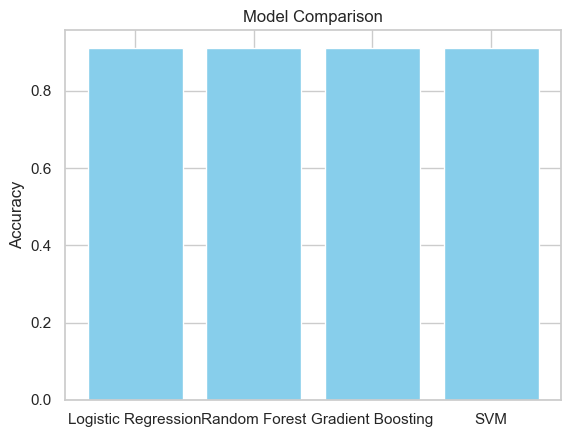

In [278]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns

bm = pd.read_csv("/Users/raghav/Downloads/bank-marketing.csv", sep=";")

# Separate features and target variable
X = bm.drop(columns=['y'])
y = bm['y'].apply(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'string']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Initialize Streamlit application
st.title("Bank Term Deposit Prediction System")
st.write("This is a recommendation system to predict whether a customer will sign up for a term deposit product.")

# Collect customer input via Streamlit widgets
age = st.slider("Age", 18, 100, 30)
job = st.selectbox("Job", ['admin', 'technician', 'services', 'retired', 'blue-collar', 'entrepreneur', 'housemaid', 'student', 'unemployed', 'management', 'self-employed', 'other'])
marital = st.selectbox("Marital Status", ['married', 'single', 'divorced'])
education = st.selectbox("Education", ['university.degree', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'professional.course', 'unknown'])
default = st.selectbox("Has Credit Default?", ['yes', 'no'])
housing = st.selectbox("Has Housing Loan?", ['yes', 'no'])
loan = st.selectbox("Has Personal Loan?", ['yes', 'no'])
contact = st.selectbox("Contact Communication Type", ['telephone', 'cellular'])
month = st.selectbox("Last Contact Month", ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
day_of_week = st.selectbox("Last Contact Day of the Week", ['mon', 'tue', 'wed', 'thu', 'fri'])
campaign = st.slider("Number of Contacts in Campaign", 1, 50, 1)
pdays = st.slider("Days since Last Contact with the Customer", -1, 1000, 999)
previous = st.slider("Number of Contacts Before this Campaign", 0, 10, 0)
poutcome = st.selectbox("Outcome of Previous Campaign", ['success', 'failure', 'nonexistent', 'other'])
emp_var_rate = st.slider("Employment Variation Rate", -3.0, 3.0, 1.1)
cons_price_idx = st.slider("Consumer Price Index", 92.0, 95.0, 93.994)
cons_conf_idx = st.slider("Consumer Confidence Index", -50.0, 50.0, -36.4)
euribor3m = st.slider("Euribor 3 Month Rate", 0.0, 10.0, 4.857)
nr_employed = st.slider("Number of Employees", 4900, 5500, 5191)
duration = st.slider("Duration of Last Contact in Seconds", 0, 5000, 0)

# Create DataFrame from user inputs
new_customer = pd.DataFrame({
    'age': [age],
    'job': [job],
    'marital': [marital],
    'education': [education],
    'default': [default],
    'housing': [housing],
    'loan': [loan],
    'contact': [contact],
    'month': [month],
    'day_of_week': [day_of_week],
    'campaign': [campaign],
    'pdays': [pdays],
    'previous': [previous],
    'poutcome': [poutcome],
    'emp.var.rate': [emp_var_rate],
    'cons.price.idx': [cons_price_idx],
    'cons.conf.idx': [cons_conf_idx],
    'euribor3m': [euribor3m],
    'nr.employed': [nr_employed],
    'duration': [duration]
})
# Fit the best model (you could also implement a GridSearch as shown in your code)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=20, random_state=42))
])

# Fit on the entire training data
pipeline.fit(X_train, y_train)

# Make prediction
likelihood = pipeline.predict_proba(new_customer)[:, 1]

# Show prediction results
st.subheader("Prediction Results")
st.write(f"Likelihood of subscribing to a term deposit: {likelihood[0]:.4f}")

# Optional: Display the classification report and confusion matrix
if st.checkbox("Show Classification Report and Confusion Matrix"):
    y_pred = pipeline.predict(X_test)
    st.subheader("Classification Report")
    st.text(classification_report(y_test, y_pred))
    st.subheader("Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    fig_cm, ax_cm = plt.subplots()
    ax_cm.imshow(cm, cmap='Blues', interpolation='nearest')
    st.pyplot(fig_cm)